# Histograms and Binnings

A simple histogram is often one of the most useful tools for exploring data, and is a graphical representation of the **distribution** of numerical data, first introduced by [Karl Pearson](https://en.wikipedia.org/wiki/Karl_Pearson) (the developer of the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)).

To construct a histogram, the first step is to "*bin*" the range of values, that is, divide the entire range of values into a series of intervals, then count how many values fall into each interval. The bins are usually specified as consecutive, and non-overlapping. The bins (intervals) must also be adjacent, and are usually equal size.


Fortunately, we don't have to do all this work! The `plt.hist()` function, creates a basic histogram in one line.

### `plt.hist()`

First we need a one-dimensional array of data. We'll let $x$ be an array of 1000 values, chosen from a *normal* distribution.

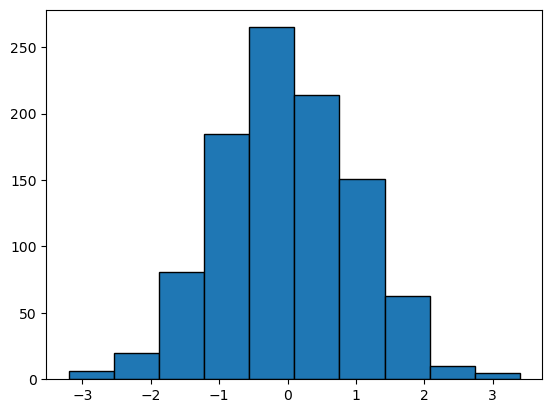

In [3]:
# these are done in my startup file
# import matplotlib.pyplot as plt
# import numpy as np

# Set the random seed to ensure reproducibility of random numbers  
# This makes sure that every time the notebook runs, the generated random numbers are the same  
np.random.seed(666)

# Create an array of 1000 random numbers drawn from a standard normal distribution (mean = 0, standard deviation = 1)
x = np.random.randn(1000)

# Create a histogram to visualize the distribution of values in the array x
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
plt.hist(x, edgecolor='black')  # 'edgecolor' adds a black border to each bin

# Show the figure
plt.show()

Note that the default number of bins is 10, we can make this more detailed by increasing the number of bins.

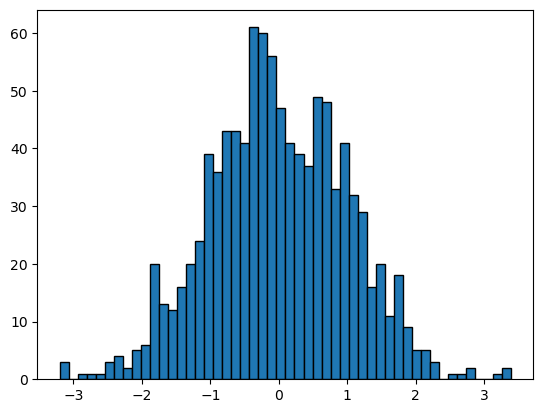

In [4]:
# Increase the number of bins
plt.hist(x, bins=50, edgecolor='black')

# Show the figure
plt.show()

The `plt.hist()` function has many options to tune both the calculation and the display,
which are well explained in its documentation ( `plt.hist?` ). Here’s an example of a more customized
histogram:

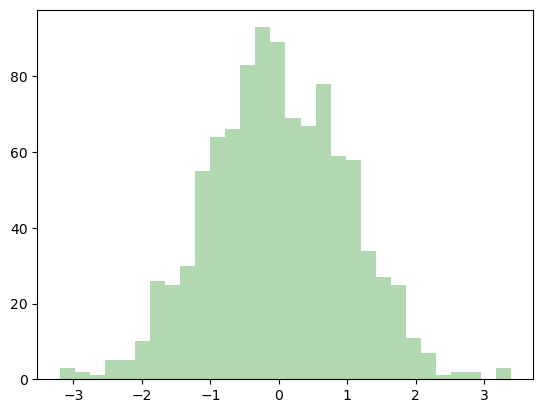

In [5]:
# Customize thie histogram even further
plt.hist(x, bins=30, alpha=0.3, color='green')

# Show the figure
plt.show()

Can you tell what each *keyword* does?

`alpha`, can be very useful when comparing histograms of several distributions:

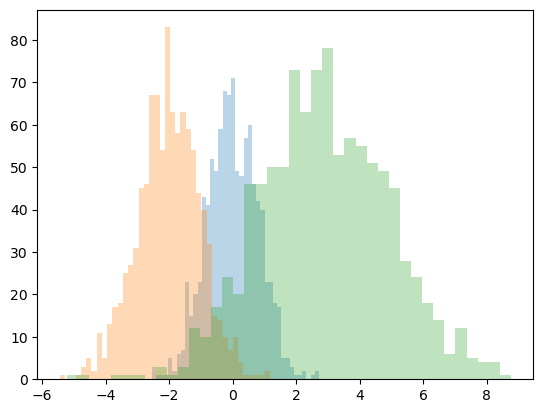

In [11]:
np.random.seed(666)

# Generate an array of 1000 values from a normal distribution with mean=0 and standard deviation=0.8
x1 = np.random.normal(0, 0.8, 1000)

# Generate an array of 1000 values from a normal distribution with mean=-2 and standard deviation=1
x2 = np.random.normal(-2, 1, 1000)

# Generate an array of 1000 values from a normal distribution with mean=3 and standard deviation=2
x3 = np.random.normal(3, 2, 1000)

# Define a dictionary with common keyword arguments for the histograms to avoid repetition
kwargs = dict(alpha=0.3, bins=40)

# Plot a histograms for x1, x2, and x3 using the keyword arguments from kwargs
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)

# Show the figure
plt.show()

Sometimes you might just want to get the **values** of the histogram bins.  
*Numpy* has a function with does this for you: `np.histogram()`

In [12]:
# Compute the histogram of the array 'x' 
# 'counts' stores the number of values (frequency) in each bin
# 'edge_values' stores the edges (bin boundaries) of the bins
# See: https://numpy.org/doc/2.1/reference/generated/numpy.histogram.html
counts, edge_values = np.histogram(x)

print(counts)
# print(edge_values)

[  6  20  81 185 265 214 151  63  10   5]


[  6.  20.  81. 185. 265. 214. 151.  63.  10.   5.]


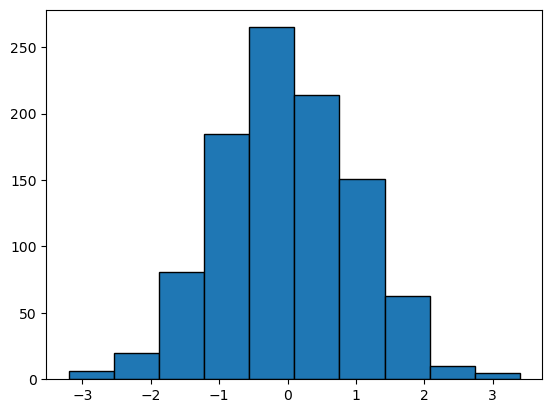

In [13]:
# Replot the histogram for array x
# 'counts' and 'edge_values' can also be returned by plt.hist()
counts, edge_values, _ = plt.hist(x, edgecolor='black')

print(counts)
# print(edge_values)

# Show the figure
plt.show()

Notice that the **counts** and **edge_values** are also returned by `plt.hist()` when it plots the histogram

So, both `np.histogram()` and `plt.hist()` return `counts, edge_values`.  

##### Why would you want those counts?

### Fit your distribution

Below I will generate 1000 Gaussian distributed values.  
The Gaussian distribution is given by
$$
P(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(\frac{(x - \mu)^2}{2\sigma^2}\right)
$$

We will generate a random number $\mu$ and a random value for $\sigma$, make a histogram, get the values of the bins, then see if we can do a fit to the function above and get an estimate of the $\mu$ and $\sigma$ values.

In [14]:
np.random.seed(666)

# Generate a random value for mu from a uniform distribution between -5 and 5
mu = np.random.uniform(-5, 5)

# Generate a random value for sigma from a uniform distribution between 3 and 5
sig = np.random.uniform(3, 5)

# Generate an array of 1000 random values from a normal distribution with mean 'mu' and standard deviation 'sig'
x = np.random.normal(mu, sig, 1000)

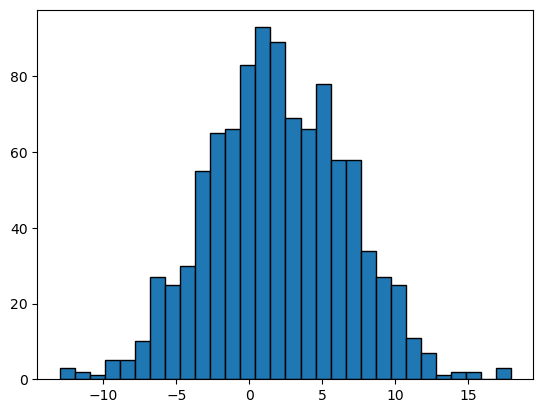

In [15]:
# Create a histogram to visualize the distribution of values in the array x
counts, edge_values, _ = plt.hist(x, bins=30, edgecolor='black')

# Show the figure
plt.show()

In [16]:
counts

array([ 3.,  2.,  1.,  5.,  5., 10., 27., 25., 30., 55., 65., 66., 83.,
       93., 89., 69., 66., 78., 58., 58., 34., 27., 25., 11.,  7.,  1.,
        2.,  2.,  0.,  3.])

In [17]:
edge_values

array([-12.97737397, -11.94764668, -10.91791939,  -9.8881921 ,
        -8.85846482,  -7.82873753,  -6.79901024,  -5.76928296,
        -4.73955567,  -3.70982838,  -2.6801011 ,  -1.65037381,
        -0.62064652,   0.40908077,   1.43880805,   2.46853534,
         3.49826263,   4.52798991,   5.5577172 ,   6.58744449,
         7.61717177,   8.64689906,   9.67662635,  10.70635364,
        11.73608092,  12.76580821,  13.7955355 ,  14.82526278,
        15.85499007,  16.88471736,  17.91444464])

Now, the **bin width** is the distance from one "edge" to the next "edge". We can find that with the `np.diff()` function. 

In [20]:
widths = np.diff(edge_values)
widths

array([1.02972729, 1.02972729, 1.02972729, 1.02972729, 1.02972729,
       1.02972729, 1.02972729, 1.02972729, 1.02972729, 1.02972729,
       1.02972729, 1.02972729, 1.02972729, 1.02972729, 1.02972729,
       1.02972729, 1.02972729, 1.02972729, 1.02972729, 1.02972729,
       1.02972729, 1.02972729, 1.02972729, 1.02972729, 1.02972729,
       1.02972729, 1.02972729, 1.02972729, 1.02972729, 1.02972729])

We can see that all the bins have width:

In [21]:
float(widths[0])

1.0297272869949374

Our target is to plot the count, at the position of the center of each bin. So what we need is an array of the values of the "**center**" of *each* bin.  

This will be clearer below.

Since `np.diff()` makes an array of the *differences* between each of the elements of the `edge_values` array.  

This means that:  

`len(widths) = len(edge_values) - 1`


In [22]:
# The length of `widths`
len(widths)

30

In [23]:
# This is equivalent to above
len(edge_values) - 1

30

Note that `len(edge_values) - 1` is also the length of the `counts` array.

In [24]:
# The length of `counts`
len(counts)

30

We can make an array of the location of the centers of all the bins, like this:

In [25]:
# Find the center of each bin by adding half the width to each edge_value (excluding the last one)
bincenters = edge_values[:-1] + widths/2
bincenters

array([-12.46251032, -11.43278304, -10.40305575,  -9.37332846,
        -8.34360117,  -7.31387389,  -6.2841466 ,  -5.25441931,
        -4.22469203,  -3.19496474,  -2.16523745,  -1.13551017,
        -0.10578288,   0.92394441,   1.9536717 ,   2.98339898,
         4.01312627,   5.04285356,   6.07258084,   7.10230813,
         8.13203542,   9.1617627 ,  10.19148999,  11.22121728,
        12.25094457,  13.28067185,  14.31039914,  15.34012643,
        16.36985371,  17.399581  ])

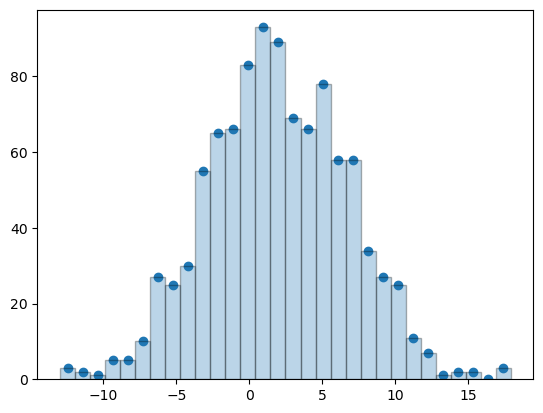

In [26]:
# Create a scatter plot with 'bincenters' on the x-axis and 'counts' on the y-axis, 
# representing the center of each bin and the count of values in each bin, respectively
plt.scatter(bincenters, counts)

# Plot a histogram to visualize the distribution of values in the array x
plt.hist(x, bins=30, alpha=0.3, edgecolor='black')

# Show the figure
plt.show()

Now we have the values of the top of each bin, and can use **curve fitting** to find the values of $\mu$ and $\sigma$.

Let's define a Gaussian function:

In [27]:
def gaussian(x: np.array, mu: int | float, sigma: int | float, A: int | float):
    # The function calculates the Gaussian (normal) distribution for each value in x
    
    # A is the amplitude (scaling factor) that adjusts the peak of the Gaussian curve
    # mu is the mean (the location of the peak of the distribution)
    # sigma is the standard deviation (which controls the width of the Gaussian curve)
    
    # The formula calculates the value of the Gaussian function for each element of x
    # exp is the exponential function, which shapes the bell curve
    # (x - mu)**2: The squared difference between each x value and the mean, which measures the distance from the center of the distribution
    # 2*sigma**2: This part normalizes the distribution based on the standard deviation, making it wider or narrower
    return A * np.exp(-(x - mu)**2/(2*sigma**2))

We can play around a bit and find values that get close to the unknown parameters:

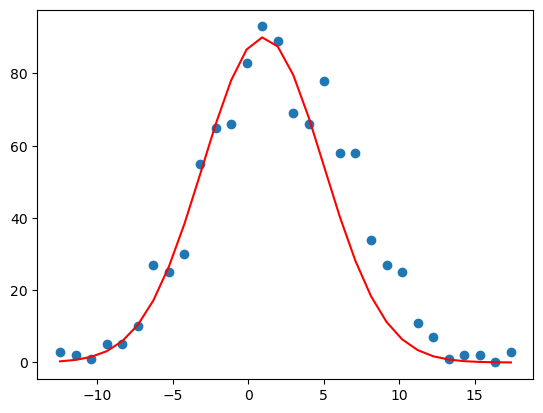

In [28]:
# Create a scatter plot with 'bincenters' on the x-axis and 'counts' on the y-axis, 
# representing the center of each bin and the count of values in each bin, respectively
plt.scatter(bincenters, counts)

# Plot the Gaussian distribution with specified values for mu, sigma, and A (to test and estimate the distribution parameters)
# We are using the gaussian function to generate a curve based on the given parameters (mu=1, sigma=4, A=90) 
# and overlaying it on the scatterplot to compare with the distribution of the data
plt.plot(bincenters, gaussian(x=bincenters, mu=1, sigma=4, A=90), 'r')

# Show the figure
plt.show()

Let's let python find the best values.

In [30]:
# Import the curve_fit function from scipy.optimize, which is used for curve fitting
from scipy.optimize import curve_fit

# Use curve_fit to estimate the parameters (mu, sigma, A) of the Gaussian function
# popt will contain the optimized parameters (mu, sigma, A), and pcov will contain the covariance of the estimates
# p0 is the initial guess for the parameters (mu=-3, sigma=4, A=90)
popt, pcov = curve_fit(gaussian, bincenters, counts, p0=[-3, 4, 90])

# Display the optimized parameters (mu, sigma, A) after fitting the Gaussian curve to the data
popt

array([ 1.88479339,  4.82620482, 85.79599408])

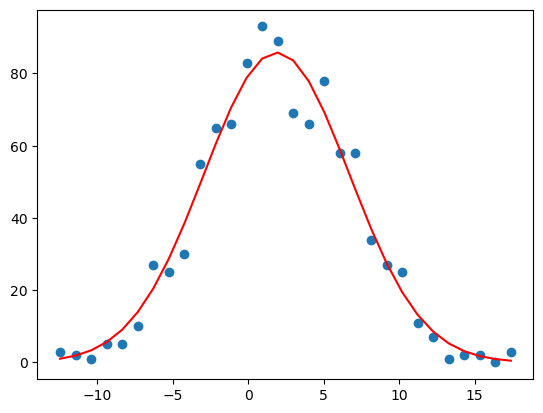

In [31]:
fitted_mu, fitted_sigma, fitted_A = popt

# Create a scatter plot with 'bincenters' on the x-axis and 'counts' on the y-axis, 
# representing the center of each bin and the count of values in each bin, respectively
plt.scatter(bincenters, counts)

# Plot the fitted Gaussian curve using the optimized parameters (mu, sigma, A) from 'popt' on the same plot
plt.plot(bincenters, gaussian(x=bincenters, mu=fitted_mu, sigma=fitted_sigma, A=fitted_A), 'r')

# Show the figure
plt.show()

#### Compare with simple statistics:

In [32]:
true_mu = x.mean()
true_sigma = x.std()

print("mu (true) = {}".format(true_mu))
print("mu (fitted) = {}".format(fitted_mu))

print("\nsigma (true) = {}".format(true_sigma))
print("sigma (fitted) = {}".format(fitted_sigma))

mu (true) = 1.942352146587294
mu (fitted) = 1.8847933946369009

sigma (true) = 4.715948096957547
sigma (fitted) = 4.8262048219192755


Now let's plot the true estimates (<span style="color: red;">**red curve**</span>) versus the fitted estimates (<span style="color: green;">**green curve**</span>).

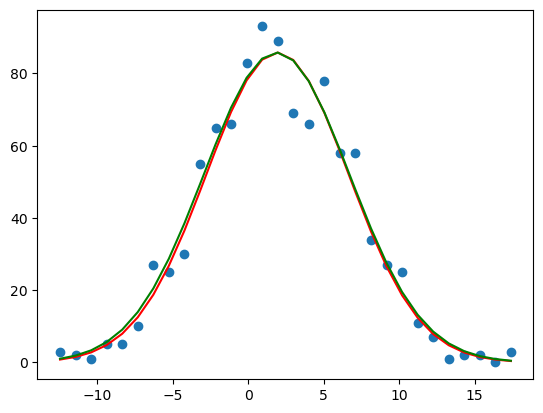

In [33]:
# Create a scatter plot with 'bincenters' on the x-axis and 'counts' on the y-axis, 
# representing the center of each bin and the count of values in each bin, respectively
plt.scatter(bincenters, counts)

# Plot the Gaussian curve using the true estimates for mu (true_mu) and sigma (true_sigma) from the data, 
# with the fitted amplitude (fitted_A) from the curve fitting
plt.plot(bincenters, gaussian(x=bincenters, mu=true_mu, sigma=true_sigma, A=fitted_A), 'r')

# Plot the Gaussian curve using the fitted estimates for mu (fitted_mu) and sigma (fitted_sigma), 
# with the fitted amplitude (fitted_A) from the curve fitting
plt.plot(bincenters, gaussian(x=bincenters, mu=fitted_mu, sigma=fitted_sigma, A=fitted_A), 'g')

# Show the figure
plt.show()

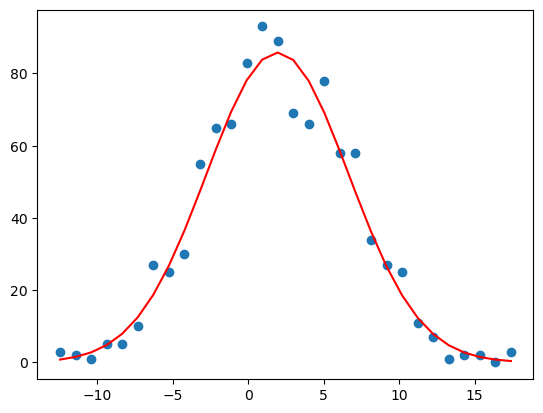

In [34]:
# Create a scatter plot with 'bincenters' on the x-axis and 'counts' on the y-axis, 
# representing the center of each bin and the count of values in each bin, respectively
plt.scatter(bincenters, counts)

# Plot the Gaussian curve using the true estimates for mu (true_mu) and sigma (true_sigma) from the data, 
# with the fitted amplitude (fitted_A) from the curve fitting
plt.plot(bincenters, gaussian(x=bincenters, mu=true_mu, sigma=true_sigma, A=fitted_A), 'r')

# Show the figure
plt.show()

--------------


### Normed histograms

However, often when looking at histograms, which show the *distribution* of the data, we are interpreting the size of the bar in each bin as the *probability*, $P(x)$, of a "measurement", $x$, falling within the range of the edges of a particular bin centered at $x$. 

If this is the case, then more measurements should not increase the probability (bar height), and more importantly, the probability of a measurement falling in ***any*** bin, *i.e.* between the first edge and the last, must be 1. Geometrically, this would the *total area under the histogram*.

Mathematically, this is the *integral* under the curve:

$$
\int_{\rm min}^{\rm max} P(x) dx = 1
$$

However, for "*binned*" data, you have a discrete set of values, not a continuous function.
The equivalent "*normalization*" is the sum over all bins:

$$
\sum_{i=1}^{N_{\rm bins}} w B_i = 1
$$

where $B_i$ is the "normalized" bar height.

We can get the **normalized** bin count values--the "*Probabilities*", by setting the keyword `density=True`, which stands for "*Return the (discrete) **Probability Density Function***", instead of the *Counts* in each bin (default: `density=False`).

Let's explore this.

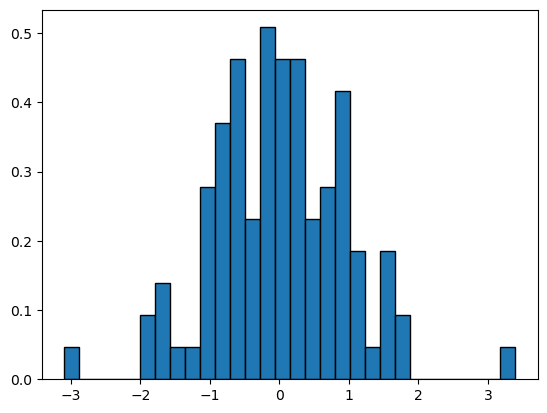

In [35]:
np.random.seed(666)

# Create an array of 100 random numbers drawn from a standard normal distribution (mean = 0, standard deviation = 1)
y = np.random.randn(100)

# Create a histogram of the data with 30 bins, normalized to a probability distribution, and black edges around each bin
plt.hist(y, bins=30, density=True, edgecolor='black')

# Display the figure
plt.show()

-------------


Let's look at our previous data. 

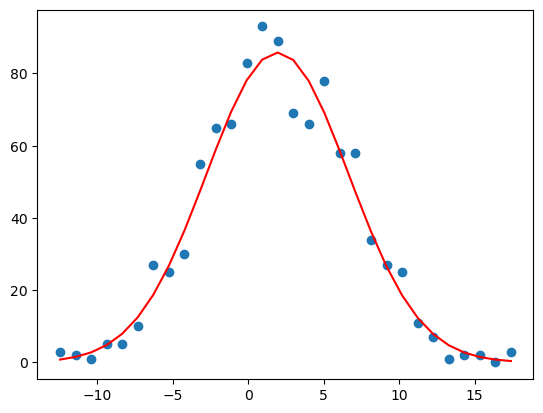

In [36]:
# Create a scatter plot with 'bincenters' on the x-axis and 'counts' on the y-axis, 
# representing the center of each bin and the count of values in each bin, respectively
plt.scatter(bincenters, counts)

# Plot the Gaussian curve using the true estimates for mu (true_mu) and sigma (true_sigma) from the data, 
# with the fitted amplitude (fitted_A) from the curve fitting
plt.plot(bincenters, gaussian(x=bincenters, mu=true_mu, sigma=true_sigma, A=fitted_A), 'r')

# Show the figure
plt.show()

With `density=False` ("bin counts") we had to *fit* the "Amplitude", $A$, of the data. If we had more data, $A$ would be bigger.

In [37]:
float(fitted_A)

85.79599407504955

However, if we set `density=True`, then we know what $A$ is.

First, let's get the `density` and `edge_values` arrays from `np.histogram()` (Notice: `density=True`).

In [38]:
# counts, edge_values = np.histogram(x) <-- default density=False returns counts
density, edge_values = np.histogram(x, bins=30, density=True)
density

array([0.00291339, 0.00194226, 0.00097113, 0.00485565, 0.00485565,
       0.00971131, 0.02622053, 0.02427827, 0.02913393, 0.0534122 ,
       0.06312351, 0.06409464, 0.08060387, 0.09031517, 0.08643065,
       0.06700803, 0.06409464, 0.07574821, 0.05632559, 0.05632559,
       0.03301845, 0.02622053, 0.02427827, 0.01068244, 0.00679792,
       0.00097113, 0.00194226, 0.00194226, 0.        , 0.00291339])

In [146]:
# np.histogram?

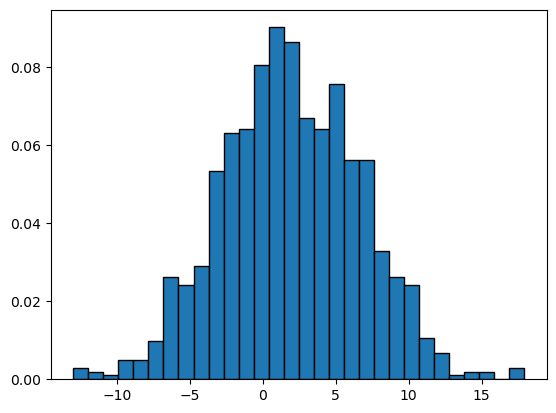

In [39]:
# Create a histogram of the data with 30 bins, normalized to a probability distribution, and black edges around each bin
plt.hist(x, bins=30, density=True, edgecolor='black')

plt.show()

The bin width, $w$, is still the same. 

In [40]:
edge_values

array([-12.97737397, -11.94764668, -10.91791939,  -9.8881921 ,
        -8.85846482,  -7.82873753,  -6.79901024,  -5.76928296,
        -4.73955567,  -3.70982838,  -2.6801011 ,  -1.65037381,
        -0.62064652,   0.40908077,   1.43880805,   2.46853534,
         3.49826263,   4.52798991,   5.5577172 ,   6.58744449,
         7.61717177,   8.64689906,   9.67662635,  10.70635364,
        11.73608092,  12.76580821,  13.7955355 ,  14.82526278,
        15.85499007,  16.88471736,  17.91444464])

In [41]:
w = edge_values[1] - edge_values[0]
float(w)

1.0297272869949374

Check that $\displaystyle{\sum_{{\rm bins}~i} w \cdot {\rm density}_i = 1}$

In [42]:
float(w*density.sum())

1.0000000000000009

If we are fitting the Gaussian function:
$$
P(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(\frac{(x - \mu)^2}{2\sigma^2}\right)
$$

This function is *normalized*,
$$
\int_0^\infty P(x) dx = 1
$$

because of the $1/\sqrt{2\pi\sigma^2}$, and in fact this is exactly the appropriate $A$ for the Gaussian fit.

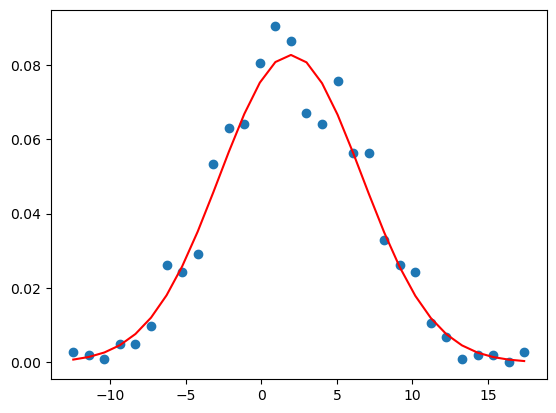

In [43]:
approximate_A = 1/np.sqrt(2*np.pi*4.826**2)

# Create a scatter plot with 'bincenters' on the x-axis and 'density' on the y-axis, 
# representing the center of each bin and the density of each bin, respectively
plt.scatter(bincenters, density)

# Plot the Gaussian curve using the true estimates for mu (true_mu) and sigma (true_sigma) from the data, 
# with the approximate amplitude (approximate_A) from the curve fitting
plt.plot(bincenters, gaussian(x=bincenters, mu=true_mu, sigma=true_sigma, A=approximate_A), 'r')

# Display the figure
plt.show()

-------------

## 2D Histograms

Just as we create histograms in one dimension by dividing the number-line into bins, we can also create histograms in two-dimensions by dividing points among two-dimensional bins. We’ll take a brief look at several ways to do this here. We’ll start by
defining some data: an x and y array drawn from a multivariate Gaussian distribution:

In [45]:
np.random.seed(666)

# Define the mean of the distribution as a list [0, 0], which represents the mean for both variables x and y
mean = [0, 0]

# Define the covariance matrix for the bivariate normal distribution
# The covariance matrix is a 2x2 matrix where cov[0][0] and cov[1][1] represent the variance of x and y, respectively,
# and cov[0][1] and cov[1][0] represent the covariance between x and y
cov = [[1, 1], [1, 2]]


# Generate 10,000 random samples from a bivariate normal distribution using the mean and covariance matrix
# np.random.multivariate_normal returns an array where each row is a sample with two values: (x, y)
# The .T transposes the result, so the x values are assigned to the variable 'x' and the y values to 'y'
x, y = np.random.multivariate_normal(mean, cov, 10000).T

print(x)
print()  # Empty line
print(y)

[-0.95342932 -1.47612637  0.54390144 ...  0.37221237  1.41253736
  0.28968525]

[-0.97844717 -1.31977253  0.75132925 ... -0.97340707 -0.26227677
 -1.75966182]


## `plt.hist2d()`: A two-dimensional histogram "contour" plot

One straightforward way to plot a 2D histogram is to use matplotlib’s `plt.hist2d()` function:

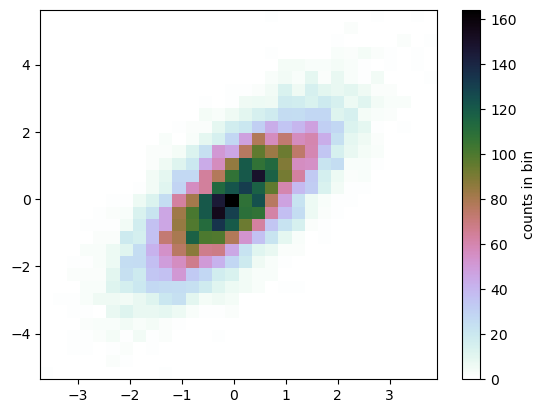

In [46]:
# Create a 2D histogram plot with the data 'x' and 'y', using 30 bins for each axis.
# The 'cmap' argument specifies the color map used for the plot
# In this case, 'cubehelix_r' is used to reverse the default 'cubehelix' color map
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist2d.html
plt.hist2d(x, y, bins=30, cmap='cubehelix_r')

# Plot the color bar
cb = plt.colorbar()

# Set the label of the color bar
cb.set_label('counts in bin')

# Show the figure
plt.show()

The `hist2d()` function has a number of extra options to fine-tune the plot and the binning, outlined in the function docstring. Further, just as `plt.hist()` has a counterpart in `np.histogram()`, `plt.hist2d()` has a counterpart in `np.histogram2d()` which can be used
as follows.

In [47]:
counts, xedge_values, yedge_values = np.histogram2d(x, y, bins=30)
# xedge_values

For the generalization of this histogram binning in dimensions higher than 2, see the **[np.histogramdd()](https://numpy.org/devdocs/reference/generated/numpy.histogramdd.html)** function.

------------

## `plt.hexbin()`: Hexagonal Binnings

One natural shape to use for a tesselation across a two-dimensional space is the regular hexagon. For this purpose, matplotlib provides the `plt.hexbin()` routine, which automatically represents a two-dimensional dataset binned within a grid of hexagons:

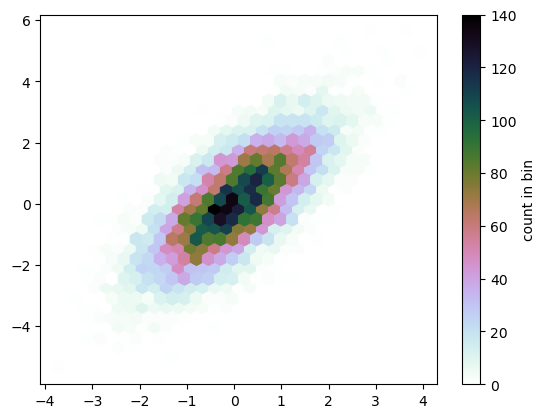

In [49]:
# Create a hexbin plot of 'x' and 'y' data with a grid size of 30 and color map 'cubehelix_r'
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hexbin.html
plt.hexbin(x, y, gridsize=30, cmap='cubehelix_r')

# Plot the color bar (Notice how you can specify the label directly)
cb = plt.colorbar(label='count in bin')

# Show the figure
plt.show()

`plt.hexbin()` has a number of interesting options, including the ability to specify
weights for each point, and to *change the output in each bin to any numpy aggregate*:
mean of weights, standard deviation of weights, etc.

-----------

## Bars and Pies

Two other common types of chart are the *bar* and *pie* plots.

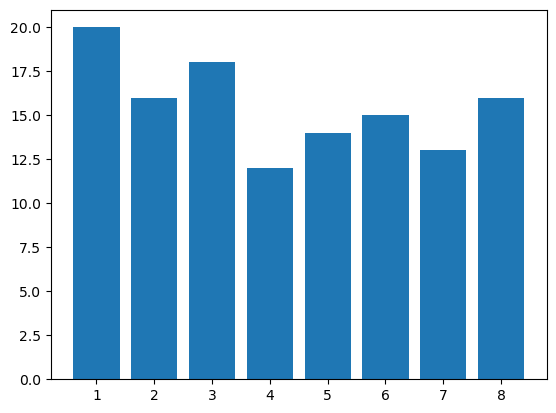

In [50]:
# Define the x values and bar heights
xvals = np.array([1, 2, 3, 4, 5, 6, 7, 8])
barheights = [20, 16, 18, 12, 14, 15, 13, 16]

# Create a bar plot
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html
plt.bar(xvals, barheights)

# Show the figure
plt.show()

You can also customize certain attributes of the bar plot like bar width, etc.

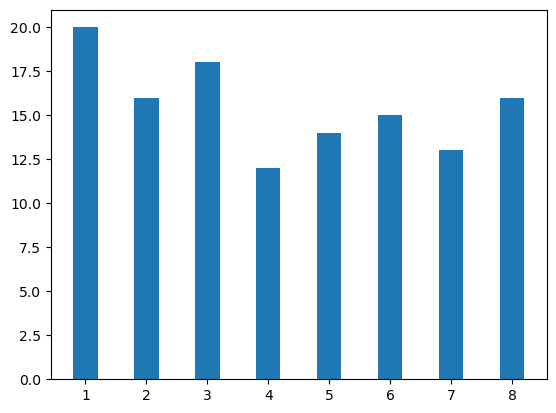

In [51]:
# Replot the bar plot
plt.bar(xvals, barheights, width=0.4)

# Show the figure
plt.show()

And with a little work: 

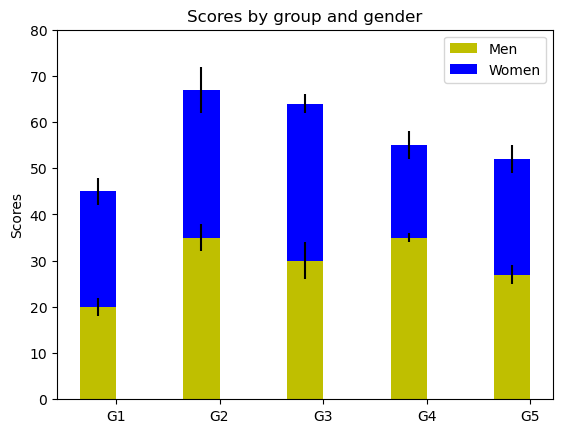

In [52]:
N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, color='y', yerr=menStd)
p2 = plt.bar(ind, womenMeans, width, color='b', bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind + width/2., ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

## And Pie Charts: `plt.pie()`

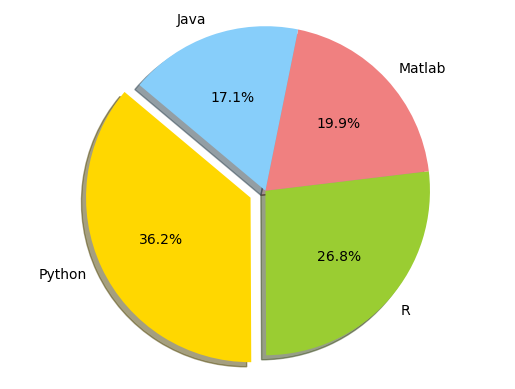

In [53]:
# Data to plot
labels = 'Python', 'R', 'Matlab', 'Java'
sizes = [445, 330, 245, 210]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.show()

------------


### A little 3D eye-candy

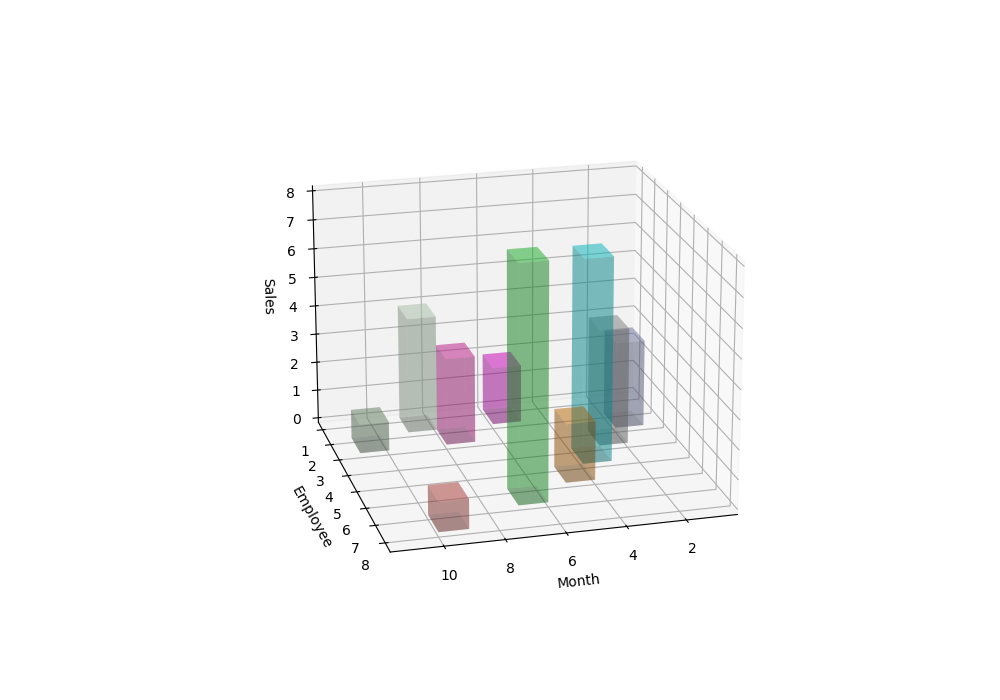

In [54]:
# When I do 3D plots, I always turn on %matplotlib widget so I can interact with figure via the mouse
%matplotlib widget

# Create figure and 3D axes
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')

# Data for the plot
xpos = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
ypos = [2, 3, 4, 5, 1, 6, 2, 1, 7, 2]
zpos = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
dx = np.ones(10)
dy = np.ones(10)
dz = np.random.randint(1, 10, 10)
c = np.random.uniform(size=(10, 3))

# Create the 3D bar chart
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=c, alpha=0.3)

# Set axis labels
ax.set_xlabel("Month")
ax.set_ylabel("Employee")
ax.set_zlabel("Sales")

# Adjust the view angle for better visibility of the z-axis label
ax.view_init(elev=20, azim=75)

# Display the plot
plt.show()